In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras import Model, layers
from keras.models import load_model, model_from_json

In [ ]:
CHANNELS=3

train_datagen = ImageDataGenerator(
    #shear_range=10,
    #zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Pinapple_project/pine apple/Pine Apple/Train',
    batch_size=32,
    class_mode='categorical',
    target_size=(224,224))

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

validation_generator = validation_datagen.flow_from_directory(
   '/content/drive/MyDrive/Pinapple_project/pine apple/Pine Apple/Validation',
    shuffle=False,
    class_mode='categorical',
    target_size=(224,224))
test_generator = validation_datagen.flow_from_directory(
   '/content/drive/MyDrive/Pinapple_project/pine apple/Pine Apple/Test',
    shuffle=False,
    class_mode='categorical',
    target_size=(224,224))

Found 100 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [ ]:
x,y=test_generator.next()
x.shape

(30, 224, 224, 3)

In [ ]:
import tensorflow as tf
from keras.layers import Dense, Activation, Flatten

dense = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False) #MobileNetV2 model algorithom download

for layer in dense.layers:
    layer.trainable = False

x = Flatten()(dense.output)
prediction = Dense(2,activation='softmax')(x) #customize the model with our dataset
model = Model(inputs=dense.input, outputs=prediction)

model.compile( #compiling our customize model
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

#callbacks = [tf.keras.callbacks.TensorBoard(log_dir='log/{}'.format(dt.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")))]

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
h=model.fit(
  train_generator,
  validation_data=test_generator,
  batch_size=32, #data train korbe 8 ta kore ekbare
  epochs=4, #hole data ke total 20 bar train korano hoi

)

Epoch 1/4
4/4 [==============================] - 11s 4s/step - loss: 0.0083 - accuracy: 0.9900 - val_loss: 0.0217 - val_accuracy: 1.0000
Epoch 2/4
4/4 [==============================] - 9s 2s/step - loss: 1.7320e-06 - accuracy: 1.0000 - val_loss: 0.0212 - val_accuracy: 1.0000
Epoch 3/4
4/4 [==============================] - 8s 2s/step - loss: 5.9605e-09 - accuracy: 1.0000 - val_loss: 0.0209 - val_accuracy: 1.0000
Epoch 4/4
4/4 [==============================] - 9s 3s/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000


In [ ]:
loss, accuracy = model.evaluate(test_generator )

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

1/1 [==============================] - 2s 2s/step - loss: 0.0011 - accuracy: 1.0000
Accuracy: 1.0
Loss: 0.0010567452991381288


In [ ]:
test_generator.class_indices

{'Bad': 0, 'Good': 1}

In [ ]:
import numpy as np
from sklearn import metrics

predictions = model.predict_generator(test_generator)
predicted_classes = np.argmax(predictions, axis = 1)
true_classes = test_generator.classes
class_labels = ['Bad','Good']
report = metrics.classification_report(true_classes, predicted_classes, target_names = class_labels)
print(report)

<ipython-input-12-6397bf7cfff7>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


              precision    recall  f1-score   support

         Bad       1.00      1.00      1.00        15
        Good       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Axes: >

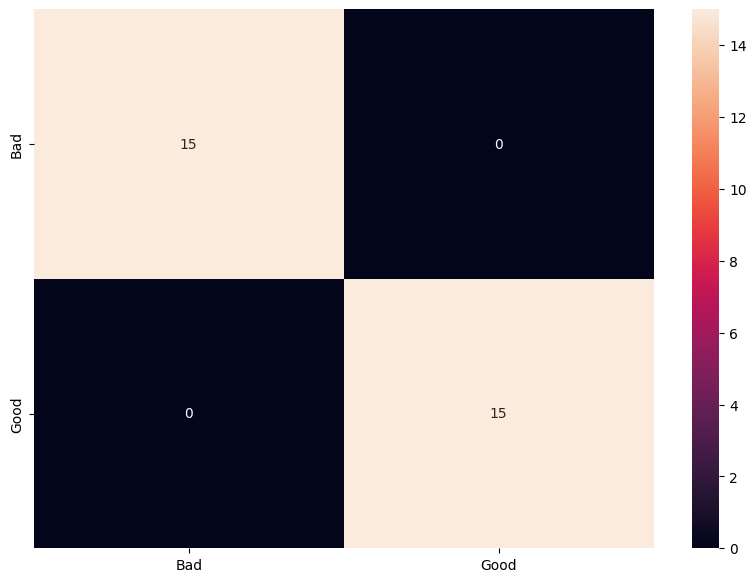

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(true_classes, predicted_classes)
df_cm = pd.DataFrame(cm, index = [i for i in ['Bad','Good']],
                  columns = [i for i in ['Bad','Good']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='d')